# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [28]:
import pandas as pd
import numpy as np

# Data visualisation

import matplotlib.pyplot as plt
# Shows plots in jupyter notebook
%matplotlib inline

import seaborn as sns
# Set plot style
sns.set(color_codes=True)


# Dates
from datetime import datetime

#remove warnings

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

---
## 2. Load data

In [4]:
df = pd.read_csv('/content/clean_eda_data.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [ ]:
df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   0.000908                   2.086294   
1                   0.000000                   0.009482   
2                   0.000000                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix var_6m_price_off_peak  \
0              99.530517                  44.235794              2.086425   
1               0.000000                   0.000000              0.009485   
2               0.000000                   0.000000              0.000004   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0       9.953056e+01              44.236702      1  
1       1.217891e-03               0.000000      0  
2       9.450150e-08               0.000000      0  

[3 rows x 44 columns]

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [6]:
price_df = pd.read_csv('/content/price_data (1).csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [7]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
2  00114d74e963e47177db89bc70108537                        -0.003994   
3  00126c87cf78d7604278f0a9adeb689e                        -0.012908   
4  001cb880d847a0b63b404a48e50aec17                        -0.010039   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.162916  
2                       -0.000001  
3                        0.162916  
4                        0.177779

In [10]:
df= pd.merge(df, diff, on='id')
df.head()

Unnamed: 0                                id  \
0           0  764c75f661154dac3a6c254cd082ea7d   
1           1  01495c955be7ec5e7f3203406785aae0   
2           2  f53a254b1115634330c12c7fdbf7958a   
3           3  d5e512dbc8118a830a7b8c7f61d89992   
4           4  6ee77a019251bcc304c88167e0dfcb4c   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
1  foosdfpfkusacimwkcsosbicdxkicaua     29552             0             1260   
2  usilxuppasemubllopkaafesmlibmsdf      2962             0                0   
3  usilxuppasemubllopkaafesmlibmsdf     10831             0             3112   
4  foosdfpfkusacimwkcsosbicdxkicaua      4442             0             2489   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
1 2010-04-21 2016-04-21      2010-04-21   2015-04-22  ...   
2 2011-09-23 2016-09-23      2011-09-23   2015-09-25  ...   
3 2011-07-11 2016-07-11      2011-07-11   2015-07-12  ...   
4 2009-11-26 2016-11-26      2009-11-26   2015-11-27  ...   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.000000                   44.444710   
1                    0.074516                   40.728885   
2                    0.000000                   44.444710   
3                    0.000000                   44.444710   
4                    0.000000                   45.444710   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0                 0.00000                    0.000000               44.612508   
1                24.43733                   16.291555               40.847060   
2                 0.00000                    0.000000               44.592310   
3                 0.00000                    0.000000               44.611348   
4                 0.00000                    0.000000               45.612576   

   mean_3m_price_peak  mean_3m_price_mid_peak churn  \
0            0.088409                0.000000     0   
1           24.537821               16.366071     0   
2            0.000000                0.000000     0   
3            0.087890                0.000000     0   
4            0.088102                0.000000     0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                        -0.004670                        0.177779  
1                        -0.007801                        0.162916  
2                        -0.003767                        0.177779  
3                        -0.001547                        0.177779  
4                        -0.001496                        2.177779  

[5 rows x 56 columns]

Average price changes as time passes

By computing the average price changes over certain time periods rather than the entire year, we can now improve the feature that our colleague created.

In [13]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean', 
                                              'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean', 
                                              'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

In [14]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [15]:
columns = ['id', 'off_peak_peak_var_mean_diff', 'peak_mid_peak_var_mean_diff', 'off_peak_mid_peak_var_mean_diff', 
           'off_peak_peak_fix_mean_diff', 'peak_mid_peak_fix_mean_diff', 'off_peak_mid_peak_fix_mean_diff']

df = pd.merge(df, mean_prices[columns], on='id')
df.head()

Unnamed: 0                                id  \
0           0  764c75f661154dac3a6c254cd082ea7d   
1           1  01495c955be7ec5e7f3203406785aae0   
2           2  f53a254b1115634330c12c7fdbf7958a   
3           3  d5e512dbc8118a830a7b8c7f61d89992   
4           4  6ee77a019251bcc304c88167e0dfcb4c   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
1  foosdfpfkusacimwkcsosbicdxkicaua     29552             0             1260   
2  usilxuppasemubllopkaafesmlibmsdf      2962             0                0   
3  usilxuppasemubllopkaafesmlibmsdf     10831             0             3112   
4  foosdfpfkusacimwkcsosbicdxkicaua      4442             0             2489   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
1 2010-04-21 2016-04-21      2010-04-21   2015-04-22  ...   
2 2011-09-23 2016-09-23      2011-09-23   2015-09-25  ...   
3 2011-07-11 2016-07-11      2011-07-11   2015-07-12  ...   
4 2009-11-26 2016-11-26      2009-11-26   2015-11-27  ...   

   mean_3m_price_mid_peak  churn  offpeak_diff_dec_january_energy  \
0                0.000000      0                        -0.004670   
1               16.366071      0                        -0.007801   
2                0.000000      0                        -0.003767   
3                0.000000      0                        -0.001547   
4                0.000000      0                        -0.001496   

   offpeak_diff_dec_january_power  off_peak_peak_var_mean_diff  \
0                        0.177779                     0.082090   
1                        0.162916                     0.020314   
2                        0.177779                     0.149682   
3                        0.177779                     0.081795   
4                        2.177779                     0.081574   

   peak_mid_peak_var_mean_diff  off_peak_mid_peak_var_mean_diff  \
0                     0.088421                         0.170512   
1                     0.028965                         0.049279   
2                     0.000000                         0.149682   
3                     0.085745                         0.167540   
4                     0.087687                         0.169261   

  off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                   44.385450                     0.000000   
1                   16.269833                     8.134914   
2                   44.311375                     0.000000   
3                   44.341005                     0.000000   
4                   44.537302                     0.000000   

   off_peak_mid_peak_fix_mean_diff  
0                        44.385450  
1                        24.404747  
2                        44.311375  
3                        44.341005  
4                        44.537302  

[5 rows x 62 columns]

This feature may be helpful because it enhances the already useful functionality that my colleague found by adding more granularity. We now have features that look at mean average price disparities across various time periods rather than differences over the course of a year (off_peak, peak, mid_peak). While inter-time-period features may reveal patterns on a micro scale between months, the Dec-Jan feature may indicate macro trends that happen over the course of an entire year.

Max price changes across periods and months

Looking at the largest price variation between periods and months is another method we can improve the functionality from our colleague.

In [17]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 
                                                                     'price_peak_var': 'mean', 
                                                                     'price_mid_peak_var': 'mean', 
                                                                     'price_off_peak_fix': 'mean', 
                                                                     'price_peak_fix': 'mean', 
                                                                     'price_mid_peak_fix': 'mean'}).reset_index()

In [18]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [19]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [20]:
columns = ['id', 'off_peak_peak_var_max_monthly_diff', 'peak_mid_peak_var_max_monthly_diff', 
           'off_peak_mid_peak_var_max_monthly_diff', 'off_peak_peak_fix_max_monthly_diff', 
           'peak_mid_peak_fix_max_monthly_diff', 'off_peak_mid_peak_fix_max_monthly_diff']

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()


Unnamed: 0                                id  \
0           0  764c75f661154dac3a6c254cd082ea7d   
1           1  01495c955be7ec5e7f3203406785aae0   
2           2  f53a254b1115634330c12c7fdbf7958a   
3           3  d5e512dbc8118a830a7b8c7f61d89992   
4           4  6ee77a019251bcc304c88167e0dfcb4c   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
1  foosdfpfkusacimwkcsosbicdxkicaua     29552             0             1260   
2  usilxuppasemubllopkaafesmlibmsdf      2962             0                0   
3  usilxuppasemubllopkaafesmlibmsdf     10831             0             3112   
4  foosdfpfkusacimwkcsosbicdxkicaua      4442             0             2489   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
1 2010-04-21 2016-04-21      2010-04-21   2015-04-22  ...   
2 2011-09-23 2016-09-23      2011-09-23   2015-09-25  ...   
3 2011-07-11 2016-07-11      2011-07-11   2015-07-12  ...   
4 2009-11-26 2016-11-26      2009-11-26   2015-11-27  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.170512                    44.385450   
1                         0.049279                    16.269833   
2                         0.149682                    44.311375   
3                         0.167540                    44.341005   
4                         0.169261                    44.537302   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     0.000000                        44.385450   
1                     8.134914                        24.404747   
2                     0.000000                        44.311375   
3                     0.000000                        44.341005   
4                     0.000000                        44.537302   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.084587                            0.089162   
1                            0.022581                            0.031859   
2                            0.151367                            0.000000   
3                            0.083972                            0.087890   
4                            0.083265                            0.088956   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.172468                          44.444710   
1                                0.054440                          16.291555   
2                                0.151367                          44.444710   
3                                0.168185                          44.444710   
4                                0.171266                          46.444710   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            0.000000                                44.44471  
1                            8.145775                                24.43733  
2                            0.000000                                44.44471  
3                            0.000000                                44.44471  
4                            0.000000                                46.44471  

[5 rows x 68 columns]

In an effort to consider the viewpoint of a PowerCo client, I believed that calculating the maximum price change across months and time periods would be a useful feature to develop. Nothing irritates me more as a utility customer than unexpected price changes between months, and a significant price increase within a short period of time would prompt me to shop around for a better deal with other utilities providers. For this use case, we are attempting to predict churn, thus I thought it would be interesting to integrate this feature.

BONUS - Feature Engineering

Tenure

    How long a company has been a client of PowerCo.

In [24]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [25]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
2       0.144068
3       0.139785
4       0.135393
13      0.133333
6       0.082084
5       0.079310
12      0.076923
7       0.074707
8       0.070175
10      0.047619
11      0.036585
9       0.000000

•♦• As we can see, clients who have just been with us for four months or less are significantly more likely to leave than those who have been with us for longer. Intriguingly, compared to other variances between ordered tenure values, the difference between 4 and 5 months is around 4%, which signifies a significant increase in the risk that a client will leave. This may indicate that keeping a customer through the 4-month mark is actually a significant accomplishment in terms of retaining them as a long-term customer.

•♦• This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

Transforming dates into months

♦ months_activ = Number of months active until reference date (Jan 2016)

♦ months_to_end = Number of months of the contract left until reference date (Jan 2016)

♦ months_modif_prod = Number of months since last modification until reference date (Jan 2016)

♦ months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [26]:
def convert_months(reference_date, eda_data, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - eda_data[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [29]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

Insights :
♦ Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power.

♦ Using intuition, we could assume that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the months_activ feature.

♦ As well as this, if we think from the perspective of a client with PowerCo, if we are coming toward the end of our contract with PowerCo our thoughts could go a few ways. We could be looking for better deals for when our contract ends, or we might want to see out our contract and sign another one. One the other hand if we have only just joined, we may have a period where we are allowed to leave if we are not satisfied. Furthermore, if we are in the middle of our contract, their may be charges if we wanted to leave, deterring clients from churning mid-way through their agreement. So, I think months_to_end will be an interesting feature because it may reveal patterns and behaviours about timing of churn.

♦ My belief is that if a client has made recent updates to their contract, they are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. I believe this to be a positive sign, they are an engaged customer, and so I believe months_modif_prod will be an interesting feature to include because it shows the degree of how 'engaged' a client is with PowerCo.

♦ Finally the number of months since a client last renewed a contract I believe will be an interesting feature because once again, it shows the degree to which that client is engaged. It also goes a step further than just engagement, it shows a level of commitment if a client renews their contract. For this reason, I believe months_renewal will be a good feature to include.

In [30]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them

remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

df = df.drop(columns=remove)
df.head()

Unnamed: 0                                id  \
0           0  764c75f661154dac3a6c254cd082ea7d   
1           1  01495c955be7ec5e7f3203406785aae0   
2           2  f53a254b1115634330c12c7fdbf7958a   
3           3  d5e512dbc8118a830a7b8c7f61d89992   
4           4  6ee77a019251bcc304c88167e0dfcb4c   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
1  foosdfpfkusacimwkcsosbicdxkicaua     29552             0             1260   
2  usilxuppasemubllopkaafesmlibmsdf      2962             0                0   
3  usilxuppasemubllopkaafesmlibmsdf     10831             0             3112   
4  foosdfpfkusacimwkcsosbicdxkicaua      4442             0             2489   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0              47.96                   0                       0.0   
1             864.73                 751                       0.0   
2             444.38                   0                       0.0   
3            1204.58                3112                       0.0   
4             561.96                2489                       0.0   

   forecast_meter_rent_12m  ...  peak_mid_peak_var_max_monthly_diff  \
0                    38.72  ...                            0.089162   
1                   144.49  ...                            0.031859   
2                    15.85  ...                            0.000000   
3                    20.94  ...                            0.087890   
4                    20.50  ...                            0.088956   

   off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                                0.172468                           44.444710   
1                                0.054440                           16.291555   
2                                0.151367                           44.444710   
3                                0.168185                           44.444710   
4                                0.171266                           46.444710   

  peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                           0.000000                                44.44471   
1                           8.145775                                24.43733   
2                           0.000000                                44.44471   
3                           0.000000                                44.44471   
4                           0.000000                                46.44471   

   tenure  months_activ  months_to_end  months_modif_prod  months_renewal  
0       6            68              3                 68               8  
1       6            68              3                 68               8  
2       5            51              8                 51               3  
3       5            53              6                 53               5  
4       7            73             10                 73               1  

[5 rows x 69 columns]

Transforming Boolean data
has_gas
We simply want to transform this column from being categorical to being a binary flag

In [31]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.103095
1        0.081633

•♦• If a consumer also purchases gas from PowerCo, it demonstrates that they are a brand-loyal customer who purchases various items. Therefore, it comes as no surprise that consumers who do not purchase gas are roughly 2% more likely to churn than those who do. Consequently, this function is helpful.

#Transforming Categorical Data

A predictive model cannot accept categorical or string values, hence as a data scientist we need to encode categorical features into numerical representations in the most compact and discriminative way possible.

The simplest method is to map each category to an integer (label encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present 0 < 1 < 2 < 3 ...

Another way to encode categorical features is to use dummy variables also known as one hot encoding. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

#channel_sales

In [32]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
print("\n ----- Value Counts of Channel Sales ----- \n")
df['channel_sales'].value_counts()


 ----- Value Counts of Channel Sales ----- 



foosdfpfkusacimwkcsosbicdxkicaua    3141
MISSING                             1639
lmkebamcaaclubfxadlmueccxoimlema     823
usilxuppasemubllopkaafesmlibmsdf     644
ewpakwlliwisiwduibdlfmalxowmwpci     431
sddiedcslfslkckwlfkdpoeeailfpeds       6
epumfxlbckeskwekxbiuasklxalciiuu       1
fixdbufsefwooaasfcxdxadsiekoceaa       1
Name: channel_sales, dtype: int64

In [33]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 
                                  'channel_epumfxlbckeskwekxbiuasklxalciiuu', 
                                  'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  764c75f661154dac3a6c254cd082ea7d       544             0   
1           1  01495c955be7ec5e7f3203406785aae0     29552             0   
2           2  f53a254b1115634330c12c7fdbf7958a      2962             0   
3           3  d5e512dbc8118a830a7b8c7f61d89992     10831             0   
4           4  6ee77a019251bcc304c88167e0dfcb4c      4442             0   

   cons_last_month  forecast_cons_12m  forecast_cons_year  \
0                0              47.96                   0   
1             1260             864.73                 751   
2                0             444.38                   0   
3             3112            1204.58                3112   
4             2489             561.96                2489   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                    38.72   
1                       0.0                   144.49   
2                       0.0                    15.85   
3                       0.0                    20.94   
4                       0.0                    20.50   

   forecast_price_energy_off_peak  ...  tenure  months_activ  months_to_end  \
0                        0.165794  ...       6            68              3   
1                        0.115174  ...       6            68              3   
2                        0.145711  ...       5            51              8   
3                        0.164637  ...       5            53              6   
4                        0.167086  ...       7            73             10   

   months_modif_prod  months_renewal  channel_MISSING  \
0                 68               8                0   
1                 68               8                0   
2                 51               3                0   
3                 53               5                0   
4                 73               1                0   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         0   
3                                         0   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

  channel_usilxuppasemubllopkaafesmlibmsdf  
0                                        0  
1                                        0  
2                                        1  
3                                        1  
4                                        0  

[5 rows x 73 columns]

In [34]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
print("\n ----- Value Counts of Origin Up ----- \n")
df['origin_up'].value_counts()


 ----- Value Counts of Origin Up ----- 



lxidpiddsbxsbosboudacockeimpuepw    3321
kamkkxfxxuwbdslkwifmmcsiusiuosws    1902
ldkssxwpmemidmecebumciepifcamkci    1429
MISSING                               33
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [41]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 
                      'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 
                      'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

KeyError: ignored

In [43]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

print("\n ----- Statistical Summary of Skewed ----- \n")
df[skewed].describe().T


 ----- Statistical Summary of Skewed ----- 



count           mean            std  min  \
cons_12m                        6686.0  157610.840862  576973.458950  0.0   
cons_gas_12m                    6686.0   26404.251421  148793.476314  0.0   
cons_last_month                 6686.0   16052.065510   65273.499428  0.0   
forecast_cons_12m               6686.0    1879.105812    2300.180996  0.0   
forecast_cons_year              6686.0    1345.752169    2549.988917  0.0   
forecast_discount_energy        6686.0       0.987586       5.153238  0.0   
forecast_meter_rent_12m         6686.0      62.373498      64.750342  0.0   
forecast_price_energy_off_peak  6686.0       0.137281       0.024112  0.0   
forecast_price_energy_peak      6686.0       0.049504       0.049098  0.0   
forecast_price_pow_off_peak     6686.0      43.144445       4.296558  0.0   

                                        25%           50%           75%  \
cons_12m                        5717.250000  14345.000000  41091.000000   
cons_gas_12m                       0.000000      0.000000      0.000000   
cons_last_month                    0.000000    782.000000   3383.750000   
forecast_cons_12m                508.322500   1117.940000   2447.797500   
forecast_cons_year                 0.000000    322.500000   1725.000000   
forecast_discount_energy           0.000000      0.000000      0.000000   
forecast_meter_rent_12m           16.170000     18.670000    131.000000   
forecast_price_energy_off_peak     0.116509      0.143166      0.146348   
forecast_price_energy_peak         0.000000      0.083816      0.098840   
forecast_price_pow_off_peak       40.606701     44.311378     44.311378   

                                         max  
cons_12m                        6.207104e+06  
cons_gas_12m                    2.813019e+06  
cons_last_month                 7.712030e+05  
forecast_cons_12m               6.135717e+04  
forecast_cons_year              6.396900e+04  
forecast_discount_energy        3.000000e+01  
forecast_meter_rent_12m         5.993100e+02  
forecast_price_energy_off_peak  2.739630e-01  
forecast_price_energy_peak      1.680920e-01  
forecast_price_pow_off_peak     5.926638e+01

In [45]:
### Applying log10 transformation

df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [47]:
print("\n ----- Statistical Summary of Skewed ----- \n")
df[skewed].describe().T


 ----- Statistical Summary of Skewed ----- 



count       mean       std  min        25%  \
cons_12m                        6686.0   4.226696  0.872260  0.0   3.757263   
cons_gas_12m                    6686.0   0.778761  1.712035  0.0   0.000000   
cons_last_month                 6686.0   2.265275  1.764741  0.0   0.000000   
forecast_cons_12m               6686.0   2.971607  0.673535  0.0   2.706993   
forecast_cons_year              6686.0   1.786763  1.581464  0.0   0.000000   
forecast_discount_energy        6686.0   0.987586  5.153238  0.0   0.000000   
forecast_meter_rent_12m         6686.0   1.510067  0.576897  0.0   1.234770   
forecast_price_energy_off_peak  6686.0   0.137281  0.024112  0.0   0.116509   
forecast_price_energy_peak      6686.0   0.049504  0.049098  0.0   0.000000   
forecast_price_pow_off_peak     6686.0  43.144445  4.296558  0.0  40.606701   

                                      50%        75%        max  
cons_12m                         4.156731   4.613757   6.792889  
cons_gas_12m                     0.000000   0.000000   6.449173  
cons_last_month                  2.893762   3.529527   5.887169  
forecast_cons_12m                3.048807   3.388953   4.787872  
forecast_cons_year               2.509874   3.237041   4.805976  
forecast_discount_energy         0.000000   0.000000  30.000000  
forecast_meter_rent_12m          1.293804   2.120574   2.778376  
forecast_price_energy_off_peak   0.143166   0.146348   0.273963  
forecast_price_energy_peak       0.083816   0.098840   0.168092  
forecast_price_pow_off_peak     44.311378  44.311378  59.266378

<ipython-input-50-39b904e0cf27>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df["cons_12m"].dropna()), ax=axs[0], color='g')
<ipython-input-50-39b904e0cf27>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1], color='orange')
<ipython-

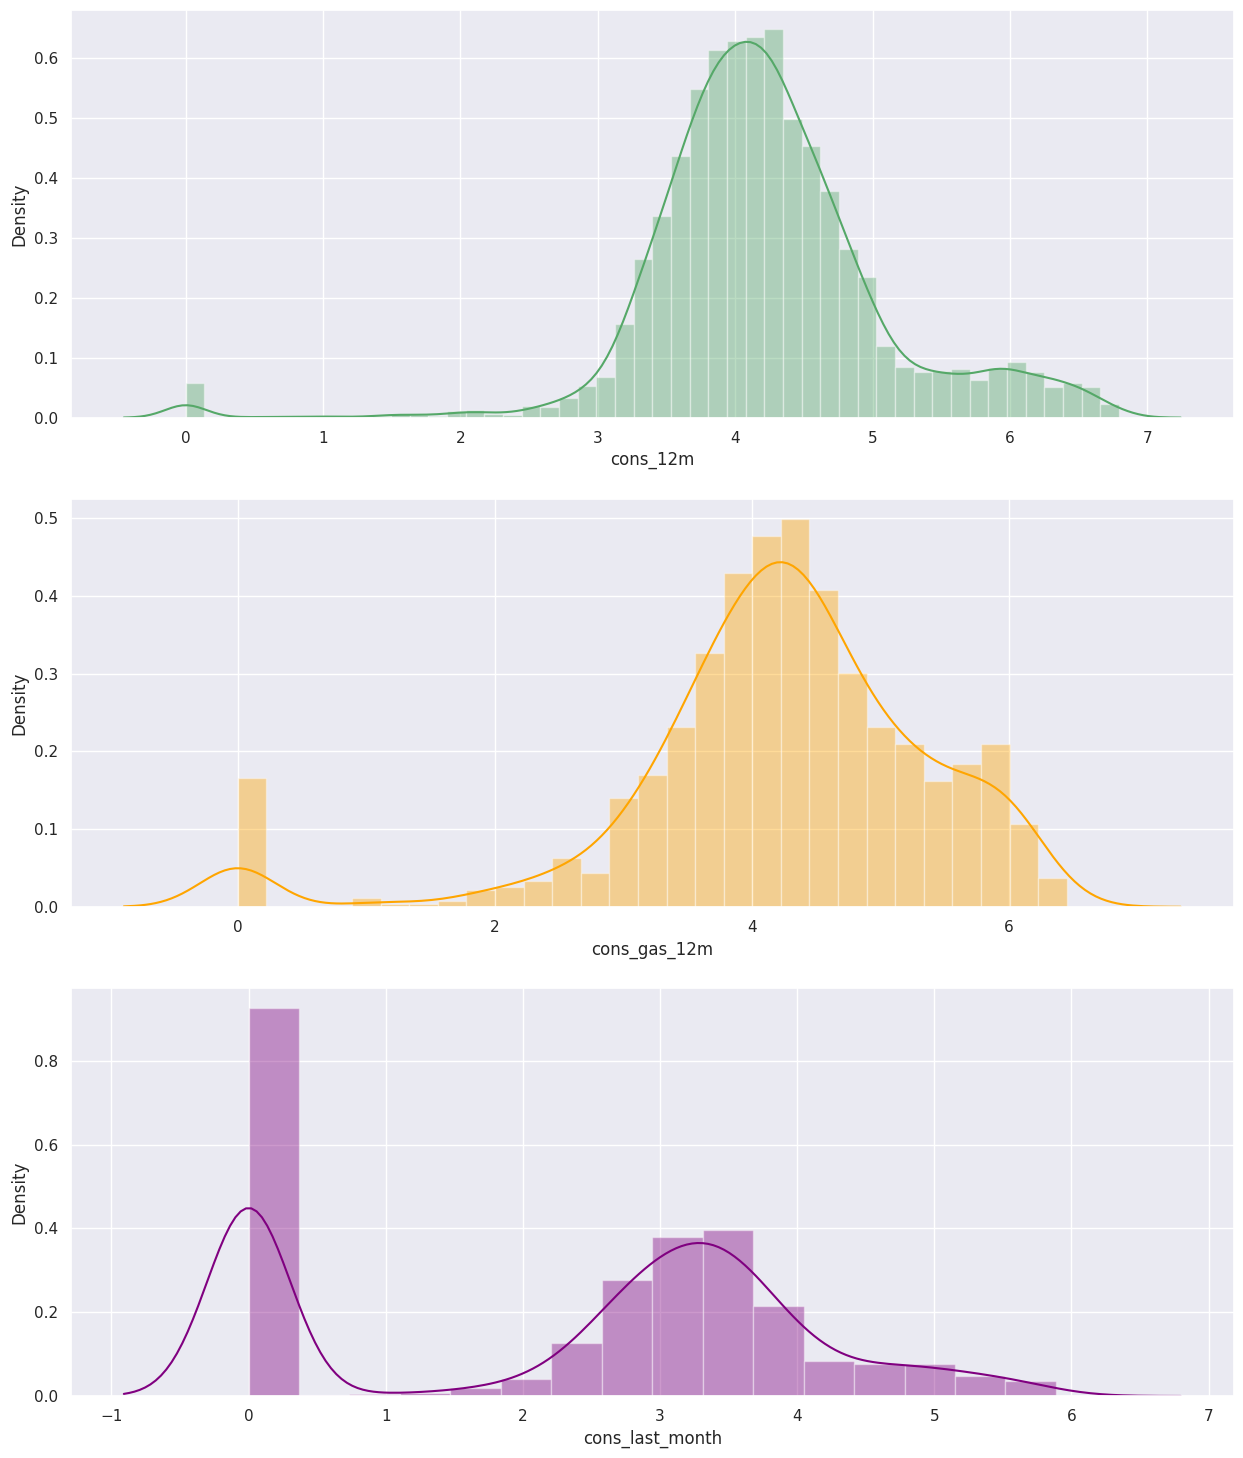

In [50]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 18))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0], color='g')
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1], color='orange')
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2], color='purple')

plt.show()

Checking Correlations of Variables
♦ In terms of creating new features and transforming existing ones, it is very much a trial and error situation that requires iteration. Once we train a predictive model we can see which features work and don't work, we will also know how predictive this set of features is. Based on this, we can come back to feature engineering to enhance our model.

♦ For now, we will leave feature engineering at this point. Another thing that is always useful to look at is how correlated all of the features are within your dataset.

♦ This is important because it reveals the linear relationships between features. We want features to correlate with churn, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model (as stated earlier) is that all features must be independent.

♦ For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption.

♦ Ideally, we want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

♦ So now let's look at how all the features within the model are correlated.

In [52]:
correlation = df.corr()

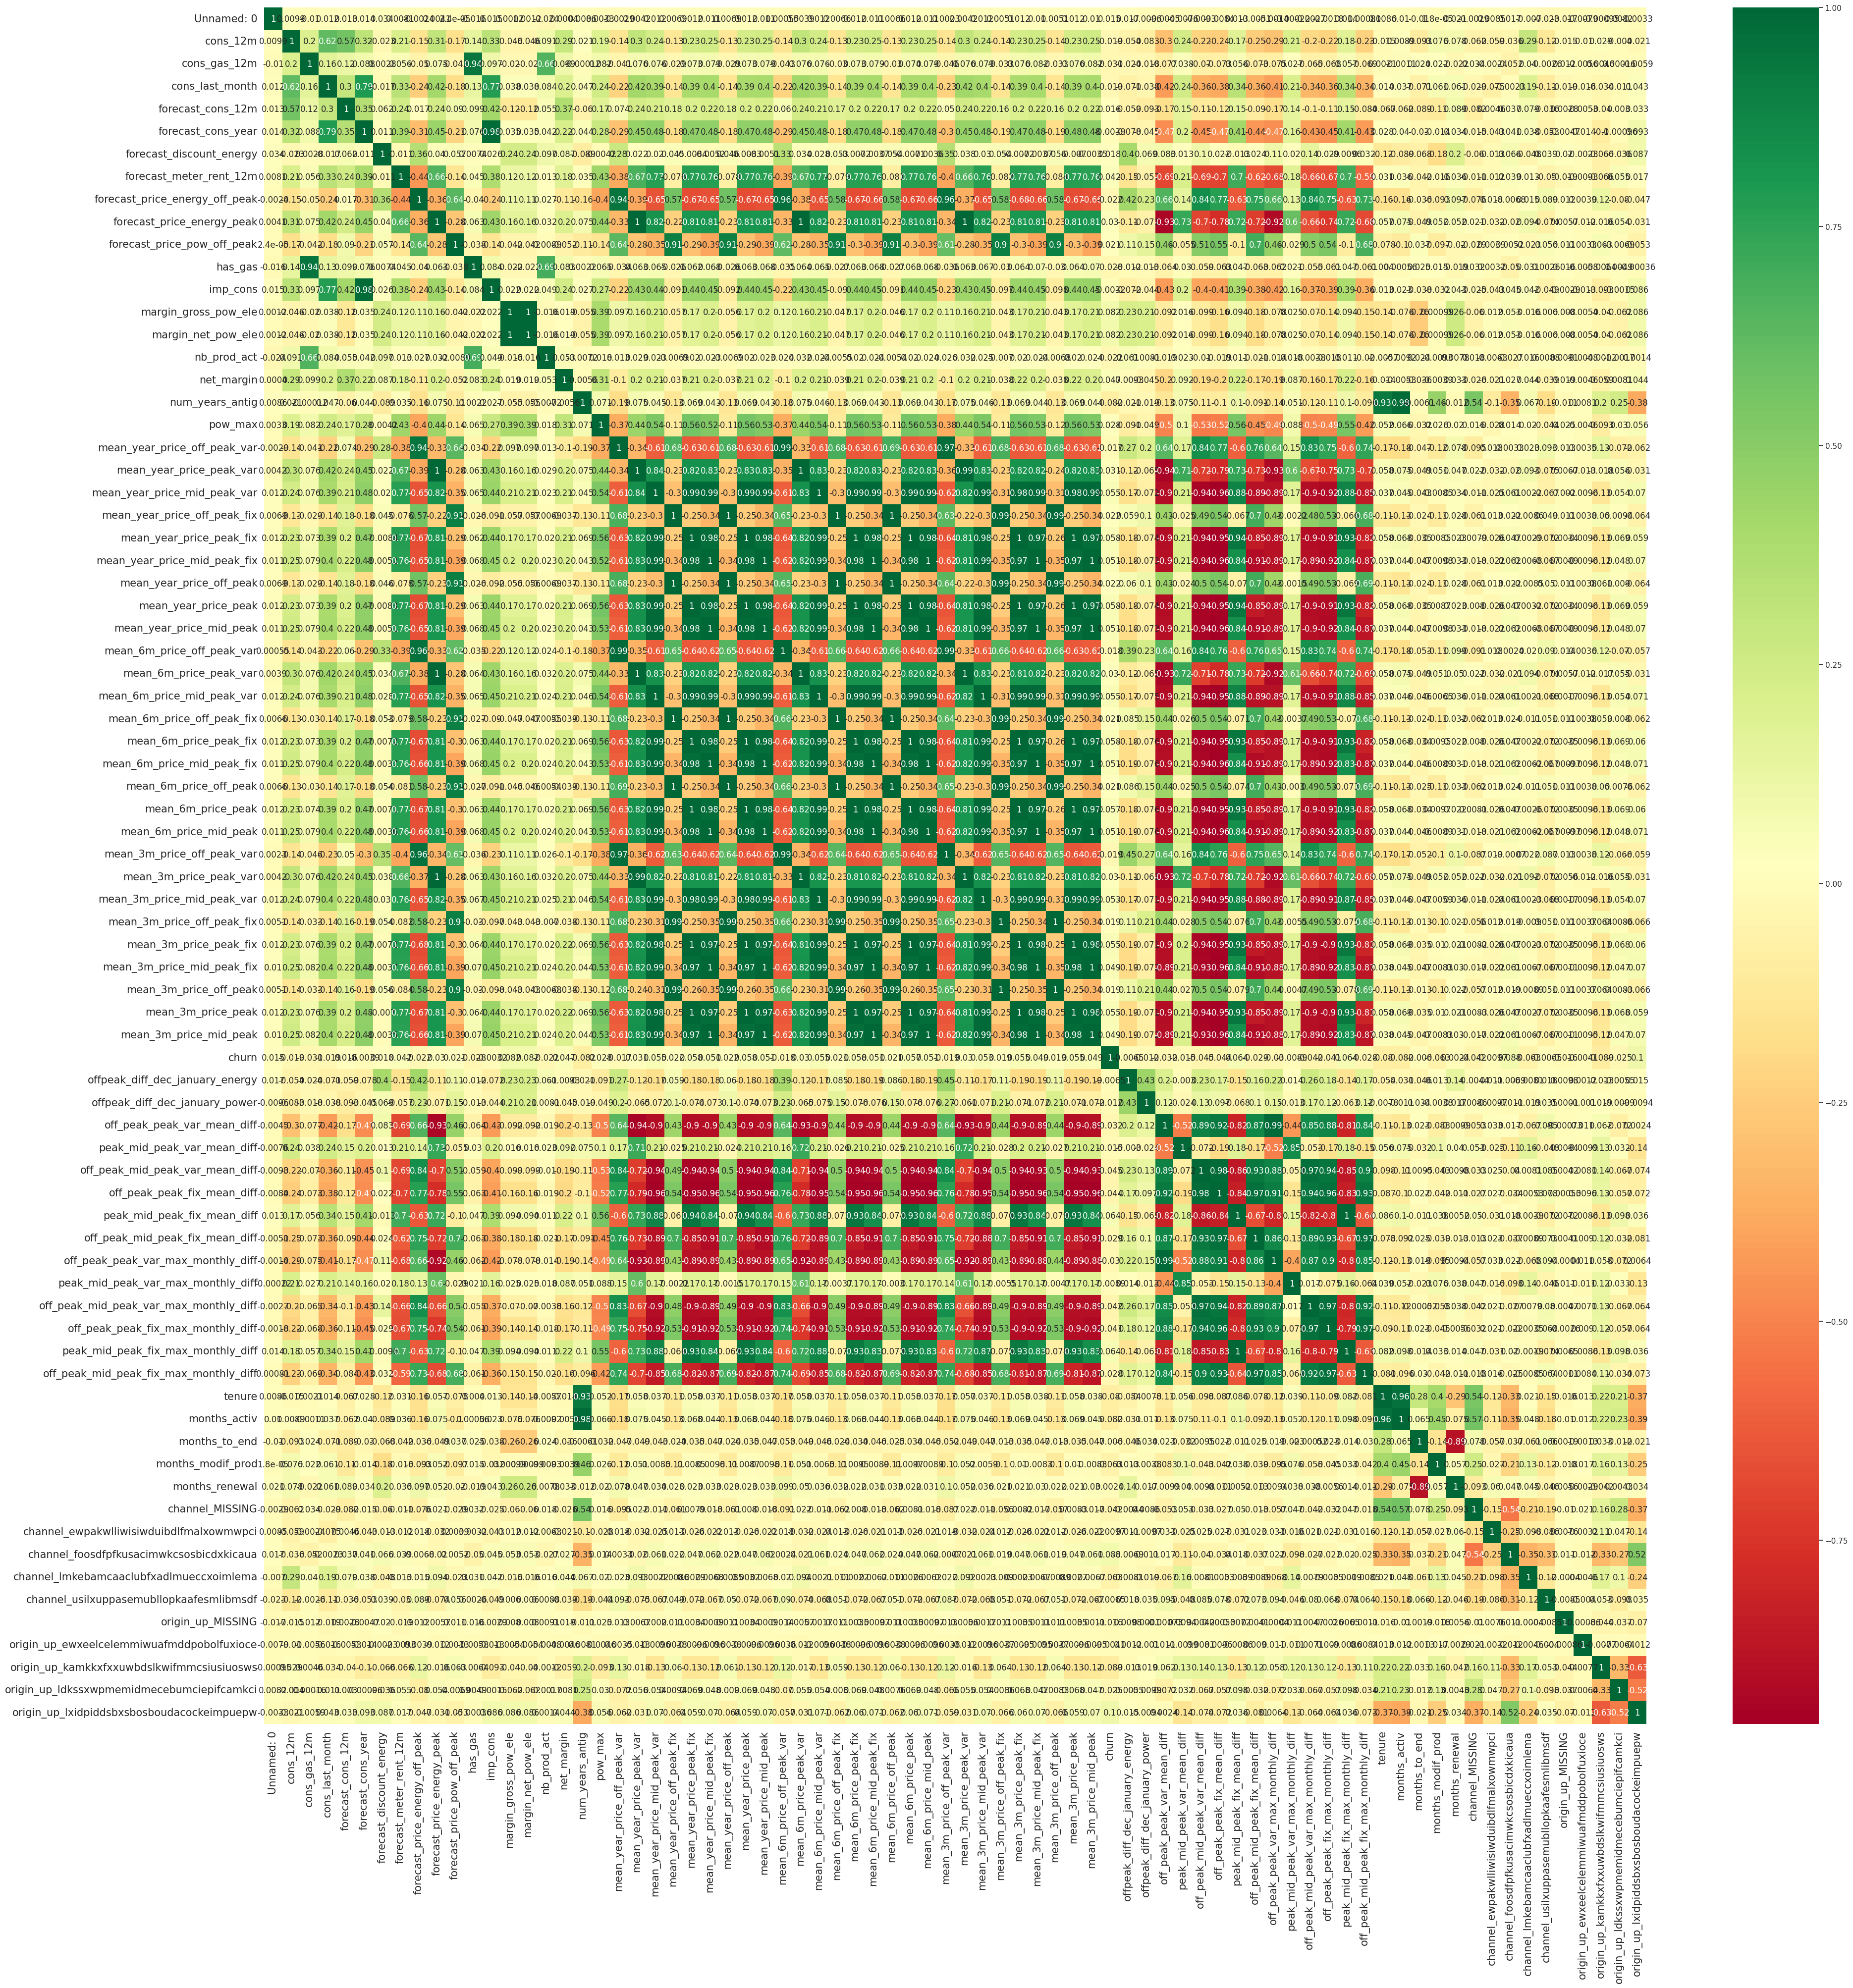

In [53]:
# Correlation Heatmap

plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}, 
    cmap='RdYlGn'
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# View of graph
plt.show()

In [54]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  764c75f661154dac3a6c254cd082ea7d  2.736397           0.0   
1           1  01495c955be7ec5e7f3203406785aae0  4.470602           0.0   
2           2  f53a254b1115634330c12c7fdbf7958a  3.471732           0.0   
3           3  d5e512dbc8118a830a7b8c7f61d89992  4.034709           0.0   
4           4  6ee77a019251bcc304c88167e0dfcb4c  3.647676           0.0   

   cons_last_month  forecast_cons_12m  forecast_discount_energy  \
0         0.000000           1.689841                       0.0   
1         3.100715           2.937382                       0.0   
2         0.000000           2.648731                       0.0   
3         3.493179           3.081196                       0.0   
4         3.396199           2.750478                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 1.599009                        0.165794   
1                 2.162833                        0.115174   
2                 1.226600                        0.145711   
3                 1.341237                        0.164637   
4                 1.332438                        0.167086   

   forecast_price_energy_peak  ...  channel_MISSING  \
0                    0.087899  ...                0   
1                    0.098837  ...                0   
2                    0.000000  ...                0   
3                    0.087381  ...                0   
4                    0.088444  ...                0   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         0   
3                                         0   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  origin_up_MISSING  \
0                                         0                  0   
1                                         0                  0   
2                                         1                  0   
3                                         1                  0   
4                                         0                  0   

   origin_up_ewxeelcelemmiwuafmddpobolfuxioce  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           1   
1                                           0   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           0  
1                                           1  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 75 columns]

#Building Prediction Model using Random Forest Classifier

#Data sampling
♦ Our dataset should initially be divided into training and test samples. We do this in order to imitate a real-world scenario by making predictions for our test sample without revealing these data points to the predictive model. This allows us to assess how effectively our model generalises to new data, which is essential.

♦ In this example, we'll utilise a split of 75–25 percent between train and test, which is typically between 20 and 30 percent.

In [56]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
X = df.drop(columns=['id', 'churn'])
y = df['churn']

In [57]:
X

Unnamed: 0  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0              0  2.736397           0.0         0.000000           1.689841   
1              1  4.470602           0.0         3.100715           2.937382   
2              2  3.471732           0.0         0.000000           2.648731   
3              3  4.034709           0.0         3.493179           3.081196   
4              4  3.647676           0.0         3.396199           2.750478   
...          ...       ...           ...              ...                ...   
6681        6681  3.040602           0.0         0.000000           2.221675   
6682        6682  3.919653           0.0         2.836324           2.921192   
6683        6683  4.940252           0.0         4.055684           2.853290   
6684        6684  3.265996           0.0         2.255273           2.281919   
6685        6685  2.120574           0.0         0.000000           1.308351   

      forecast_discount_energy  forecast_meter_rent_12m  \
0                          0.0                 1.599009   
1                          0.0                 2.162833   
2                          0.0                 1.226600   
3                          0.0                 1.341237   
4                          0.0                 1.332438   
...                        ...                      ...   
6681                       0.0                 1.231470   
6682                       0.0                 2.123067   
6683                       0.0                 2.166785   
6684                       0.0                 2.115943   
6685                       0.0                 0.912753   

      forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                           0.165794                    0.087899   
1                           0.115174                    0.098837   
2                           0.145711                    0.000000   
3                           0.164637                    0.087381   
4                           0.167086                    0.088444   
...                              ...                         ...   
6681                        0.146694                    0.000000   
6682                        0.115237                    0.100123   
6683                        0.120372                    0.103487   
6684                        0.116900                    0.100015   
6685                        0.145711                    0.000000   

      forecast_price_pow_off_peak  ...  channel_MISSING  \
0                       44.311378  ...                0   
1                       40.606701  ...                0   
2                       44.311378  ...                0   
3                       44.311378  ...                0   
4                       46.305378  ...                0   
...                           ...  ...              ...   
6681                    44.311378  ...                0   
6682                    40.939027  ...                0   
6683                    40.606701  ...                0   
6684                    40.606701  ...                0   
6685                    44.311378  ...                0   

      channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
6681                                         0   
6682                                         1   
6683                                         0   
6684                                         0   
6685                                         0   

      channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                            1   
1                                            1   
2                                            0   
3        

In [58]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6681    0
6682    0
6683    0
6684    1
6685    0
Name: churn, Length: 6686, dtype: int64

In [59]:
print(X.shape)
print(y.shape)

(6686, 73)
(6686,)


In [60]:
## Split data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Checking shape of train and test data

In [61]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(5014, 73)
(5014,)
(1672, 73)
(1672,)


#Random Forest Classifier

we are using a Random Forest classifier in this example. A Random Forest sits within the category of ensemble algorithms because internally the Forest refers to a collection of Decision Trees which are tree-based learning algorithms. As the data scientist, we can control how large the forest is (that is, how many decision trees you want to include).

The reason why an ensemble algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm.

With ensemble methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. We would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if we train our learners not to overfit, but to learn weak patterns within the data and we have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging.

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:
The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
It is able to handle non-linear parameters better than linear based models
On the flip side, some disadvantages of the random forest classifier include:
The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
Training time can be longer due to the increased complexity and size of thee ensemble

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

#Model prediction on X_test data

In [63]:
## prediction of test data
y_pred = rf_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

#Model Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

We are going to use 3 metrics to evaluate performance:

Accuracy = the ratio of correctly predicted observations to the total observations
Precision = the ability of the classifier to not label a negative sample as positive
Recall = the ability of the classifier to find all the positive samples
ROC & AUC = It tells how much the model is capable of distinguishing between classes.
K-Fold Cross Validation = how the results of a statistical analysis will generalize to an independent data set.
The reason why we are using these five metrics is because a simple accuracy is not always a good measure to use. To give an example, let's say you're predicting heart failures with patients in a hospital and there were 100 patients out of 1000 that did have a heart failure.

If you predicted 80 out of 100 (80%) of the patients that did have a heart failure correctly, you might think that you've done well! However, this also means that you predicted 20 wrong and what may the implications of predicting these remaining 20 patients wrong? Maybe they miss out on getting vital treatment to save their lives.

As well as this, what about the impact of predicting negative cases as positive (people not having heart failure being predicted that they did), maybe a high number of false positives means that resources get used up on thee wrong people and a lot of time is wasted when they could have been helping the real heart failure sufferers.

This is just an example, but it illustrates why other performance metrics are necessary such Precision and Recall, which are good measures to use in a classification scenario.

#Importing Model Evaluation Metrics

In [64]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report


In [65]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:- ", accuracy)
print("\n ----- Classification Report ----- \n")
print(classification_report(y_test, y_pred))

Accuracy score:-  0.8905502392344498

 ----- Classification Report ----- 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1491
           1       0.42      0.03      0.05       181

    accuracy                           0.89      1672
   macro avg       0.66      0.51      0.50      1672
weighted avg       0.84      0.89      0.85      1672



[[1484    7]
 [ 176    5]]


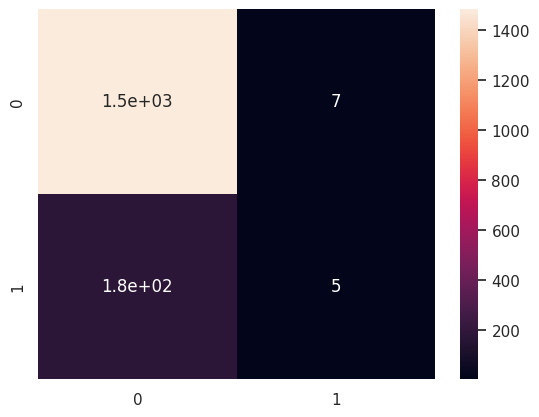

In [66]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)
plt.show()

In [67]:

print("Precision Score is - ", precision_score(y_test, y_pred))

Precision Score is -  0.4166666666666667


In [68]:
print("Recall Score is - ", recall_score(y_test, y_pred))

Recall Score is -  0.027624309392265192


In [69]:
print("F1 Score is - ", f1_score(y_test, y_pred))

F1 Score is -  0.05181347150259067


In [70]:
auc = roc_auc_score(y_test, y_pred)
print("AUC score:- ", auc)

AUC score:-  0.511464736855757


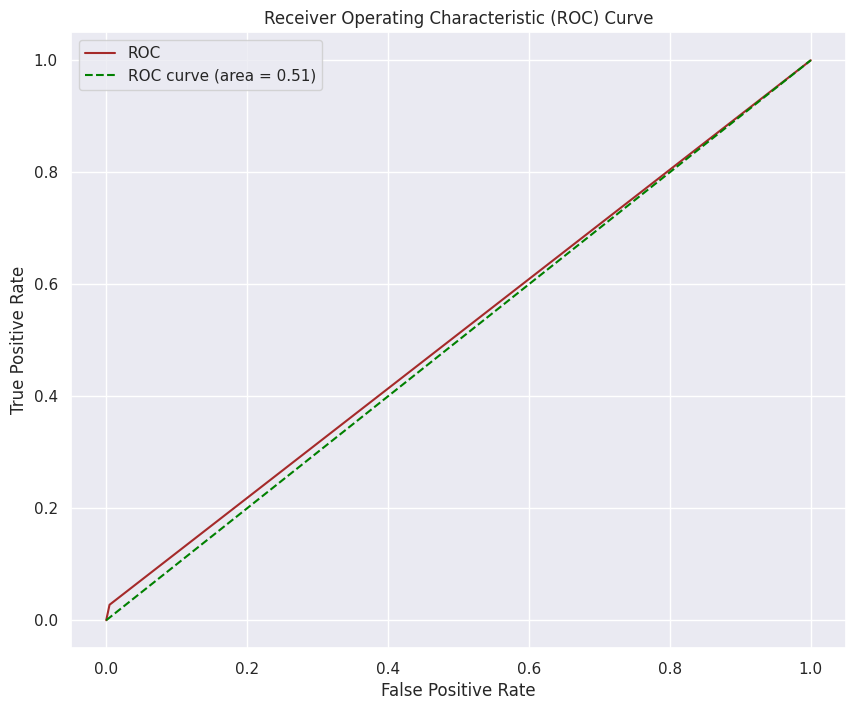

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='brown', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [72]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(cv_scores))

Cross-validation scores:[0.90229312 0.90528415 0.90528415 0.90229312 0.90319361]


In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(cv_scores.mean()))

#MODEL EVALUATION SUMMARY :
                    Model Accuracy : 0.9033
                    Precision      : 0.9166
                    Recall         : 0.0589
                    F1 Score       : 0.1108
                    AUC            : 0.5291
                    K-Fold         : 0.9083
#Model Understanding

♦ Examining feature_importances is a quick and easy way to comprehend a model's findings. There are several ways to calculate feature importance, however using the Random Forest classifier, we are able to extract feature_importances using the built-in approach on the trained model. feature_importances reflect the importance of a feature within the prediction model. The amount of times each feature is used for splitting across all trees in the Random Forest scenario is represented by the feature importance.

In [73]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

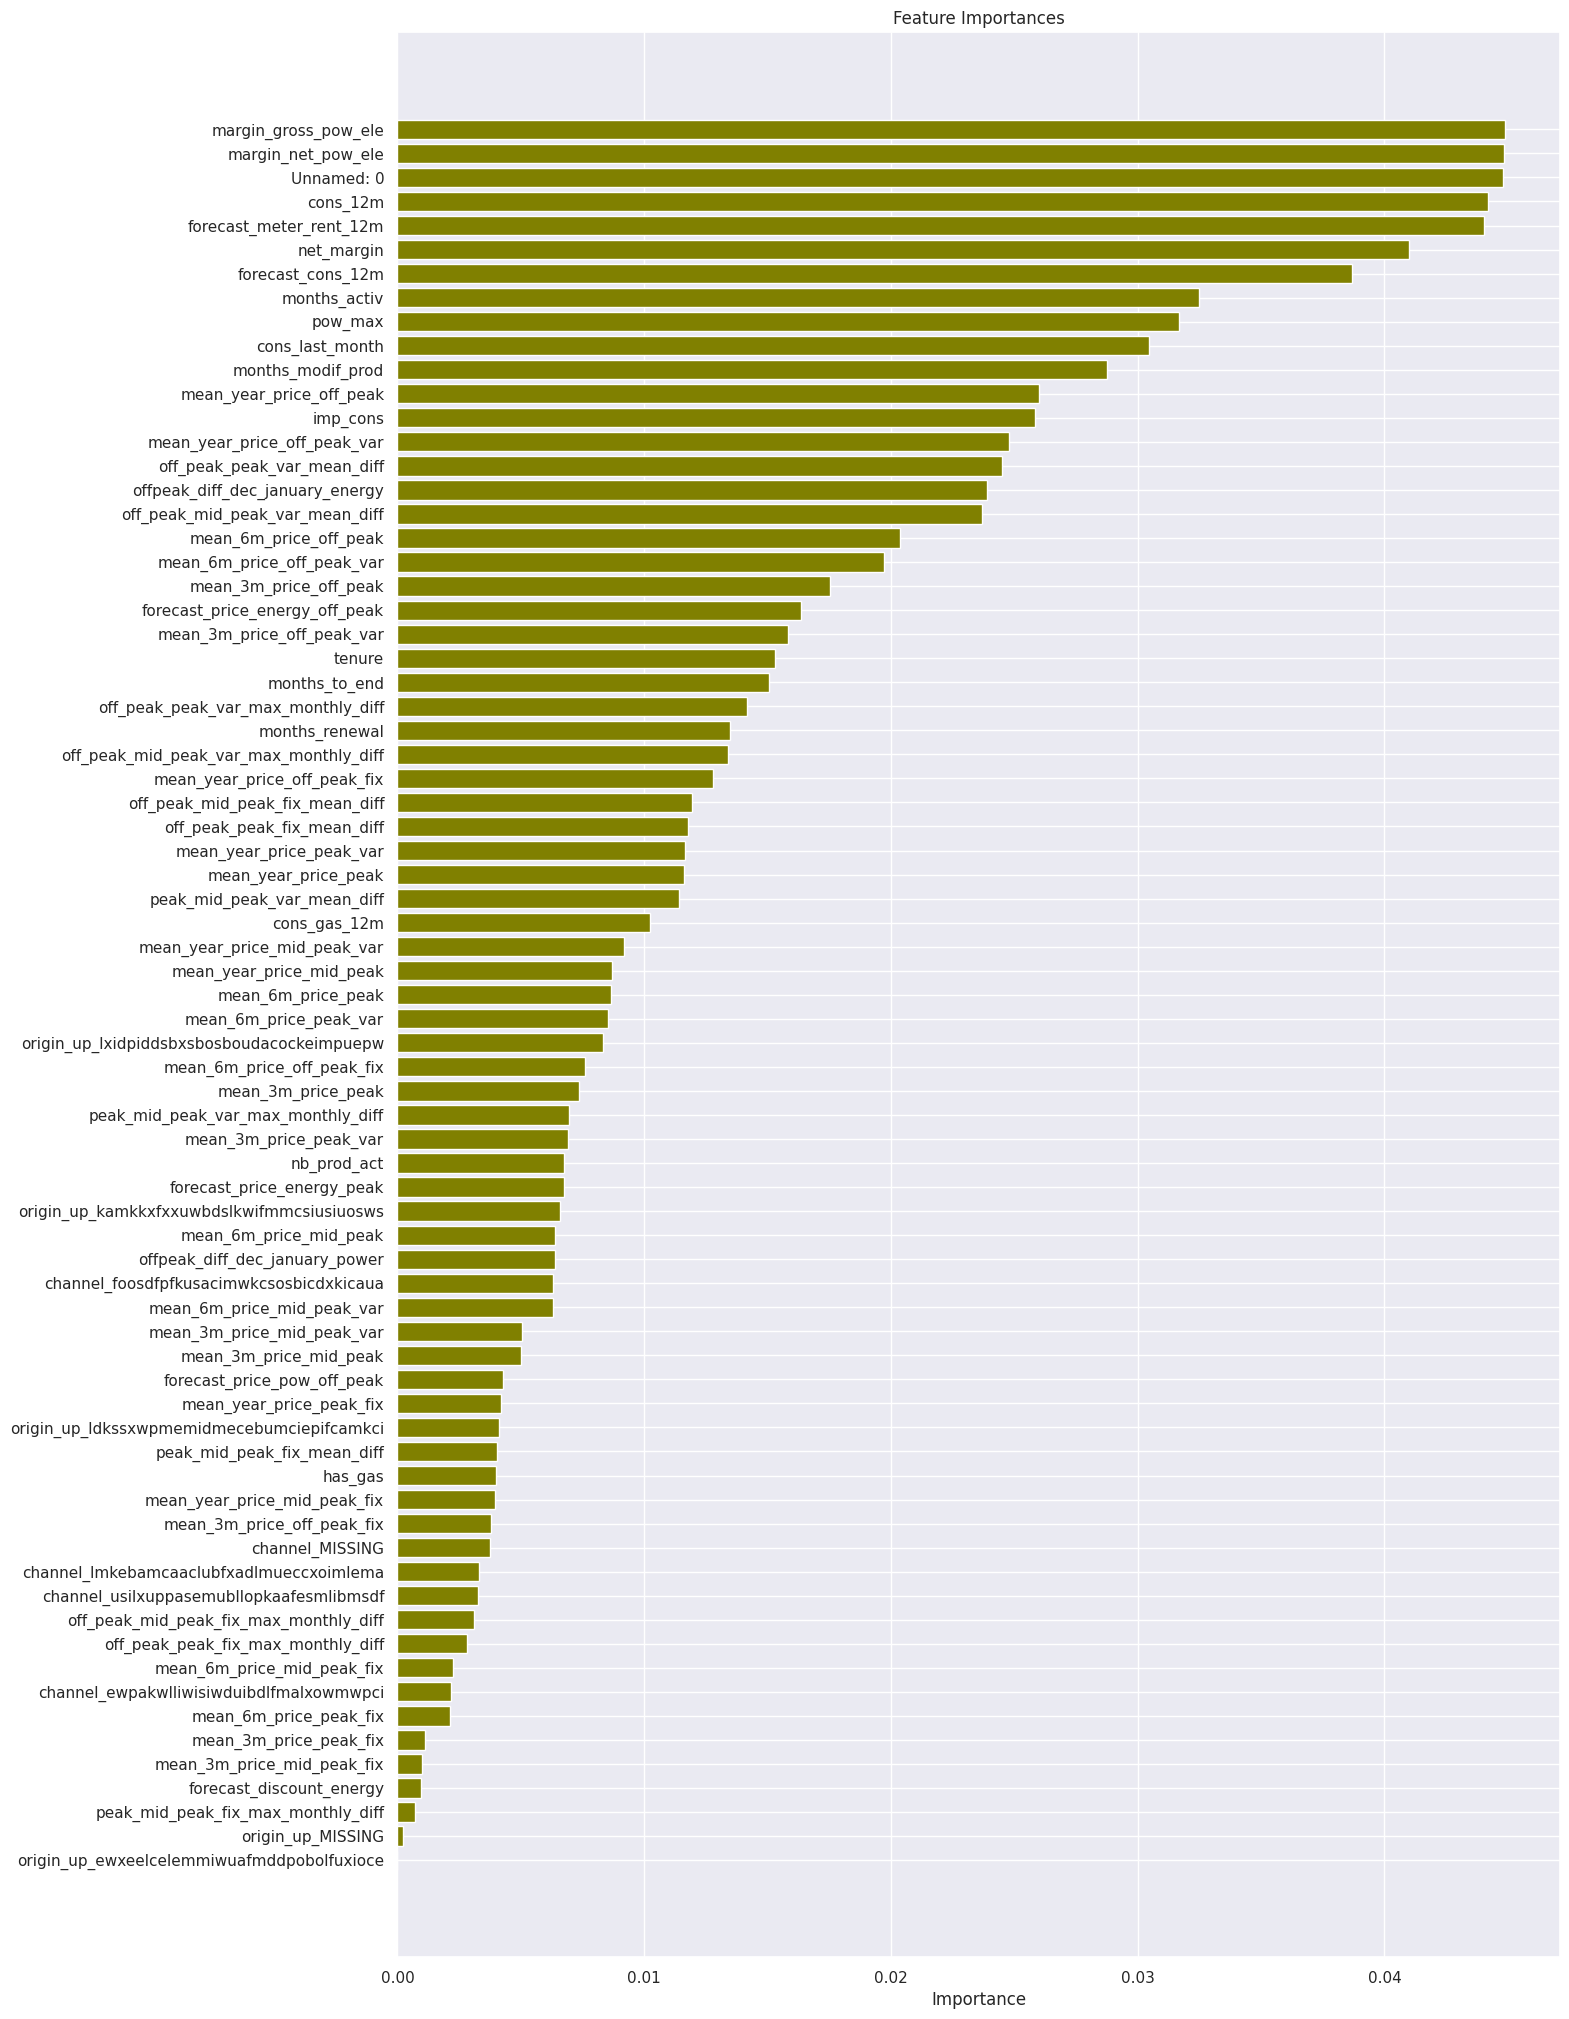

In [74]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='olive', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

Net margin on power subscription and consumption over 12 months is a top driver for churn in this model
Forecasted bill of meter rental for the next 2 months also is an influential driver
Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it
Our price sensitivity features are scattered around but are not the main driver for a customer churning
The last observation is important because this relates back to our original hypothesis:

> Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [75]:
proba_predictions = rf_classifier.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [76]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [77]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('predicted_data.csv')

Business impact of discount
We conduct a brief analysis on the discount strategy proposed. This is just 1 way to solve it, there may be many other ways!

The SME division head proposed that we give a 20% discount to high propensity to churn customers. We can assume to start that everyone who is offered a discount will accept it.

Workflow
Our task is to calculate the forecast revenue for the set of customers:

When no discount is offered
And when a discount is offered based on a probability cutoff to decide who should receive the 20% discount
And hence to decide where the cut-off should be set in order to maximise revenue

In [78]:
test_data = pd.read_csv('predicted_data.csv')
test_data.drop(test_data.columns[0], axis=1, inplace=True)
test_data.head()

Unnamed: 0  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         247  3.858417           0.0         2.966611           2.436163   
1        2463  3.543944           0.0         2.603144           2.719679   
2        6079  4.410440           0.0         3.789651           3.119859   
3        6525  3.942702           0.0         2.045323           2.956557   
4        2669  4.141356           0.0         3.101403           3.142668   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 1.229170   
1                       0.0                 1.211654   
2                       0.0                 1.288249   
3                       0.0                 2.159447   
4                       0.0                 2.165393   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.145711                    0.000000   
1                        0.145711                    0.000000   
2                        0.144902                    0.000000   
3                        0.116509                    0.101397   
4                        0.115360                    0.100243   

   forecast_price_pow_off_peak  ...  channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                    44.311378  ...                                         1   
1                    44.311378  ...                                         1   
2                    44.311378  ...                                         1   
3                    40.939027  ...                                         0   
4                    40.606701  ...                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  origin_up_MISSING  \
0                                         0                  0   
1                                         0                  0   
2                                         0                  0   
3                                         1                  0   
4                                         0                  0   

   origin_up_ewxeelcelemmiwuafmddpobolfuxioce  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  churn  churn_probability  
0                                           1      0              0.064  
1                                           1      0              0.293  
2                                           1      0              0.030  
3                                           1      0              0.087  
4                                           1      0              0.130  

[5 rows x 75 columns]

In [79]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step

test_data['basecase_revenue'] = (np.power(10, test_data['forecast_cons_12m']) + 1) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']

# Taking churn into account
test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn'])

Calculate the estimated benefits and costs of intervention
Now, pick a cut-off probability (eg 0.5) so that:

Customers with a higher churn probability than the cut-off get a discount, and
Customers below the churn-probability do not get a discount.
From this, calculate the revenue of the intervention scenario assuming:

All customers who are offered a discount accept it
Customers who do receive a discount are are assumed not to churn in the next twelve months (ie churn probability = 0), and therefore the retained
revenue is 0.8basecase_revenue , being (1-discount_fraction)basecase_revenue

Customers who do not receive a discount are assumed to churn based on the observed dependent variable (ie, a 1 or 0 for whether they actually
churned or not).

Now, map out the revenue delta as a function of the cut-off probability in a graph. What cut-off probability approximately optimises the revenue outcome? Assume for these calculations that the customer does not consume more or less electricity because the price changes. In practice, we would expect that if the customer's cost goes down then their consumption might increase. We will see two counterbalancing effects at play:

For true positives we will see revenue retention vs the no-discount scenario
For false positives we will see reduced revenue from giving them a discount when they wouldn't in fact churn.
(False negatives represent an opportunity cost but not an actual cost difference between the two scenarios.)

The optimal cut-off point will balance the benefits from true positives against the costs of false positives. Our task is to approximately find the optimal cut-off point. We may need to make additional assumptions. If we feel the assumptions above aren't justified and that others are better then we should modify our assumptions.

In [80]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

In [ ]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='orange')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

Optional extra: how to select the cut-off?
Above, we decided who to offer the discount to based on a probability cut-off. Is this the optimal strategy?

For instance, we might be offering discounts to customers who are not very profitable, thus worsening our overall margins substantially. For example, if offering a discount makes the customer unprofitable on a net margin basis then we might want to let them churn rather than save them.
Even if we only consider revenue, this strategy might not be optimal from a revenue viewpoint. For instance, we can calculate the expected revenue impact of our strategy and prioritise customers for discounts that have a high expected revenue impact. (This means that the probability of churn might be high but they also might be valuable customers).
A general principle here is that we can afford to spend more on retaining high-value customers because the costs of losing them are higher. A very common mistake in business applications of churn is to focus on the churn probability whilst forgetting the value impact (to greater or lesser extents). We have seen many cases where our clients spend as much effort on retaining unprofitable customers as they do on retaining highly profitable customers.

In [81]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=500):
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff and rev
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given for high-value customers => customer stays for full year, independent
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev),
    'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

In [83]:
## Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
plot_tradeoff = (rev_deltas_high_value)

Note:

In this case, it doesn't make sense to prioritize large-revenue customers, since the overall revenue delta is much lower than when targeting everyone. However, this is only the case here since the intervention doesn't depend on the number of customers (simply adjusting prices). The interventions usually go beyond simply adjusting prices to prevent churn.
There may be the option of intensifying the customer relation, adding key account managers, or other interventions that do incur costs depending on how many customers are targeted. In that case, it may be benefitial to target only a subset of customers to save on these costs, even if the delta in the figure above is reduced.
Optional extra: Using forecast rather than actual churn
We may have noticed above that we used actual churn outcomes in calculating the financial impact. Actual churn outcomes are fine if we know them and are conducting a retrospective analysis of the effectiveness of a strategy. This example of analysis is commonly known as "backtesting", ie seeing how well a strategy would have performed historically.

Of course, one must be careful that any analysis is done using out-of-sample data. Conducting the analysis on the training data will lead to predictions that are too optimistic.

In practice, actual outcomes may not be available because they are in the future. An alternative is to optimise predicted/forecast revenue based on the probabilities which are an output from our churn model. In this case, we would replace the actual churn outcomes (churn) with the predicted probability of churn from our model. The results here are obviously model-dependent.

If our model probabilities are poorly calibrated then we can end up with quite poor results from this. Going down this path therefore usually requires the extra step of checking how well calibrated the model probabilities are, and potentially correcting for any miscalibration using Platt scaling, sigmoid calibration or isotonic regression.

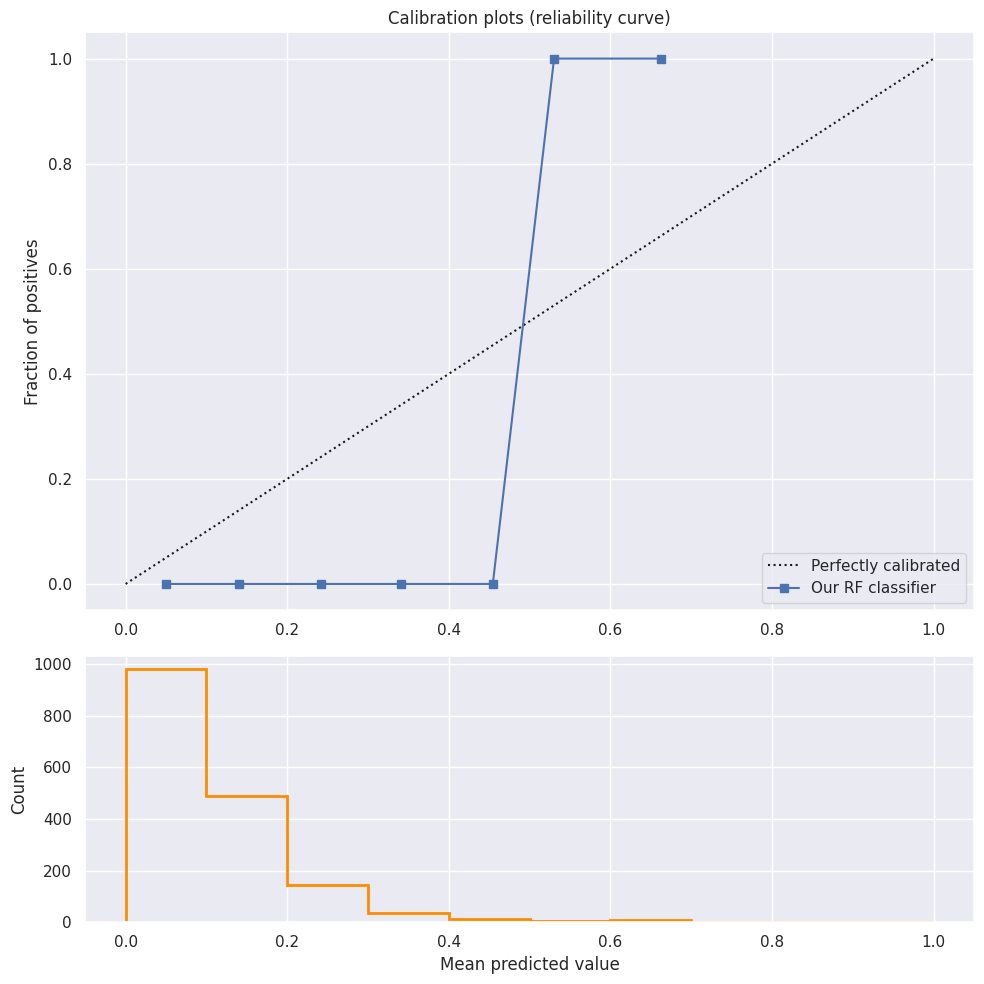

In [84]:
# Check our calibration

from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_data['churn'],
    y_prob=test_data['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_data['churn_probability'], range=(0, 1), bins=10, color='darkorange', histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

In [85]:
# Electricity evenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more d
# Note that we need to reverse the log10-transformation from the data cleaning step

test_data['basecase_revenue'] = np.power(10, test_data['forecast_cons_12m']) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']
# Taking churn into account
test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn_probability'])

In [90]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)

TypeError: ignored